In [4]:
import pandas as pd
import h5py
import hdf5plugin
from datetime import datetime

# Path to UK-DALE HDF5 file
file_path = '/users/kjain/Downloads/ukdale.h5'

# Define a manual mapping of meters to appliances (Update if needed)
# Define a manual mapping of meters to appliances
# Define a manual mapping of meters to appliances
# Define a manual mapping of meters to appliances
meter_mapping = {
    'meter1': 'Main Power',
    'meter2': ['Television', 'DVD Player', 'Set-Top Box', 'Light'],
    'meter3': ['Kettle', 'Radio'],
    'meter4': 'Gas Boiler',
    'meter5': 'Freezer',
    'meter6': ['Washing Machine', 'Microwave', 'Breadmaker']
}

# Open the HDF5 file
with h5py.File(file_path, 'r') as hdf:
    print("Keys:", list(hdf.keys())) # Check available buildings

    # Navigate to House 1's electricity data
    house_path = 'building4/elec'
    house_data = hdf[house_path]

    # List to store DataFrames for each meter
    meter_dfs = []

    # Process meters (select relevant meters based on mapping)
    for meter_id in meter_mapping.keys():
        meter_path = f"{house_path}/{meter_id}"

        if "table" in house_data[meter_id]:
            print(f"Processing {meter_id} ({meter_mapping[meter_id]})...")
            table_data = house_data[meter_id]['table']
            
            # Read data in chunks (optimized for memory usage)
            timestamps = []
            power_values = []

            for entry in table_data[:500000]: # Read only 500,000 entries at a time
                timestamp, power = entry
                timestamps.append(datetime.utcfromtimestamp(timestamp / 1e9)) # Convert nanoseconds
                power_values.append(power[0]) # Extract first power value

            # Create DataFrame
            df_meter = pd.DataFrame({'timestamp': timestamps, meter_mapping[meter_id]: power_values})

            # Append to list (we will merge later)
            meter_dfs.append(df_meter)

    # Merge all meter DataFrames on timestamp
    df = meter_dfs[0]
    for meter_df in meter_dfs[1:]:
        df = df.merge(meter_df, on='timestamp', how='outer') # Outer join to include all timestamps

    # Convert timestamp to DateTimeIndex
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

    # ✅ Filter for January 2013
    df_month = df.loc['2013-03-09':'2013-04-09']

    # Save to CSV
    df_month.to_csv('house4_january2013_some_appliances.csv')

print("✅ Data saved to house4_january2013_some_appliances.csv")

Keys: ['building1', 'building2', 'building3', 'building4', 'building5']
Processing meter1 (Main Power)...
Processing meter2 (['Television', 'DVD Player', 'Set-Top Box', 'Light'])...


TypeError: unhashable type: 'list'

In [7]:
import pandas as pd
import h5py
import hdf5plugin
from datetime import datetime

file_path = '/users/kjain/Downloads/ukdale.h5'

# Convert list values to a single string (comma-separated)
meter_mapping = {
    'meter1': 'Main Power',
    'meter2': 'Television, DVD Player, Set-Top Box, Light',
    'meter3': 'Kettle, Radio',
    'meter4': 'Gas Boiler',
    'meter5': 'Freezer',
    'meter6': 'Washing Machine, Microwave, Breadmaker'
}

with h5py.File(file_path, 'r') as hdf:
    print("Keys:", list(hdf.keys()))  # Check available buildings

    # Navigate to House 4's electricity data
    house_path = 'building4/elec'
    house_data = hdf[house_path]

    # List to store DataFrames for each meter
    meter_dfs = []

    # Process meters
    for meter_id, meter_name in meter_mapping.items():
        meter_path = f"{house_path}/{meter_id}"
        
        if meter_id in house_data and "table" in house_data[meter_id]:
            print(f"Processing {meter_id} ({meter_name})...")
            table_data = house_data[meter_id]['table']

            timestamps = []
            power_values = []

            for entry in table_data[:500000]:  # Read only 500,000 entries
                timestamp, power = entry
                timestamps.append(datetime.utcfromtimestamp(timestamp / 1e9))  # Convert nanoseconds
                power_values.append(power[0])  # Extract first power value

            # Create DataFrame
            df_meter = pd.DataFrame({'timestamp': timestamps, meter_name: power_values})
            meter_dfs.append(df_meter)

    # Merge all meter data on the timestamp column
    df = meter_dfs[0]
    for meter_df in meter_dfs[1:]:
        df = df.merge(meter_df, on='timestamp', how='outer')  # Outer join to include all timestamps

    # Convert timestamp to datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

    # Extract data for the given date range
    df_month = df.loc['2013-03-09':'2013-04-09']

    # Save to CSV
    df_month.to_csv('house4_january2013_some_appliances.csv')

print("✅ Data saved to house4_january2013_some_appliances.csv")


Keys: ['building1', 'building2', 'building3', 'building4', 'building5']
Processing meter1 (Main Power)...
Processing meter2 (Television, DVD Player, Set-Top Box, Light)...
Processing meter3 (Kettle, Radio)...
Processing meter4 (Gas Boiler)...
Processing meter5 (Freezer)...
Processing meter6 (Washing Machine, Microwave, Breadmaker)...
✅ Data saved to house4_january2013_some_appliances.csv


In [1]:
import pandas as pd
# Load the CSV file
df = pd.read_csv('/Users/kjain/Project/house4_january2013_some_appliances.csv', parse_dates=['timestamp'], index_col='timestamp')

df.describe()


,Main Power,"Television, DVD Player, Set-Top Box, Light","Kettle, Radio",Gas Boiler,Freezer,"Washing Machine, Microwave, Breadmaker"
count,439974.000000,437667.000000,442085.000000,442298.000000,439083.000000,434012.000000
mean,530.652875,22.105027,21.818261,57.113102,30.426375,27.034679
std,631.612331,20.727063,240.866370,48.640899,51.315946,209.211977
min,122.000000,4.000000,0.000000,7.000000,0.000000,0.000000
25%,218.000000,13.000000,0.000000,8.000000,0.000000,0.000000
50%,328.000000,15.000000,0.000000,94.000000,0.000000,0.000000
75%,569.000000,15.000000,0.000000,106.000000,88.000000,0.000000
max,8276.000000,201.000000,3983.000000,220.000000,2263.000000,3969.000000


In [2]:
df.head()

,Main Power,"Television, DVD Player, Set-Top Box, Light","Kettle, Radio",Gas Boiler,Freezer,"Washing Machine, Microwave, Breadmaker"
timestamp,,,,,,
2013-03-09 14:40:07,637.0,NaN,NaN,NaN,NaN,NaN
2013-03-09 14:40:13,625.0,13.0,0.0,106.0,98.0,0.0
2013-03-09 14:40:19,625.0,13.0,0.0,106.0,98.0,0.0
2013-03-09 14:40:25,622.0,13.0,0.0,106.0,98.0,0.0
2013-03-09 14:40:31,NaN,13.0,0.0,107.0,99.0,NaN


/var/folders/sj/1c1l30xn36dgw92bwyf1rn_w0000gp/T/ipykernel_15749/1847902108.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('1H').mean()


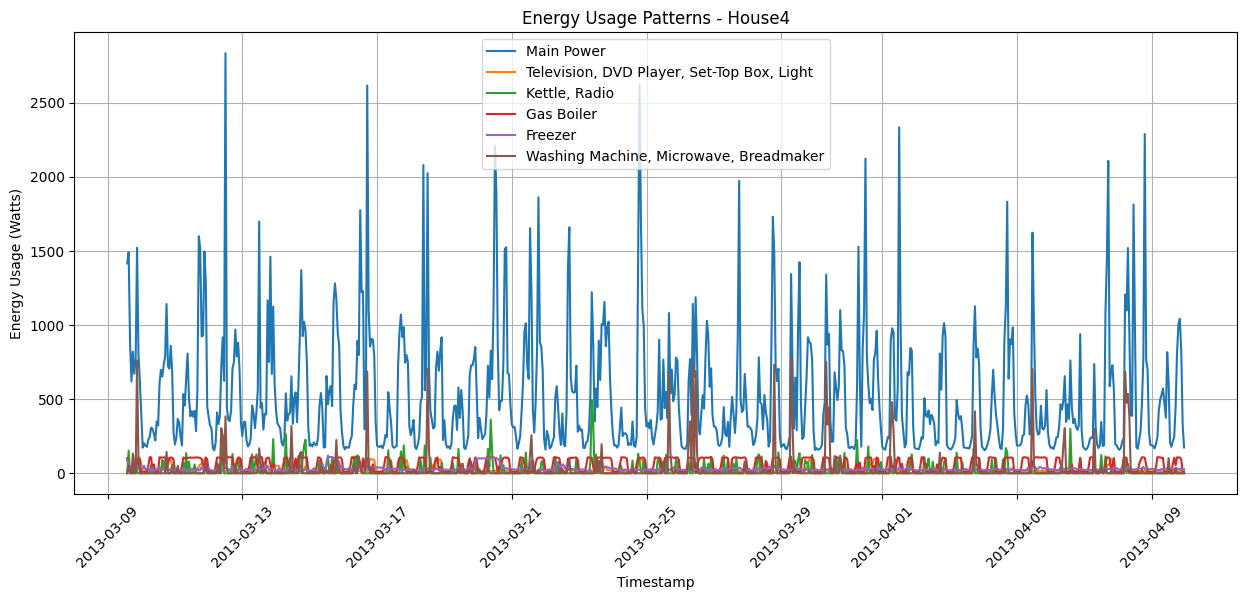

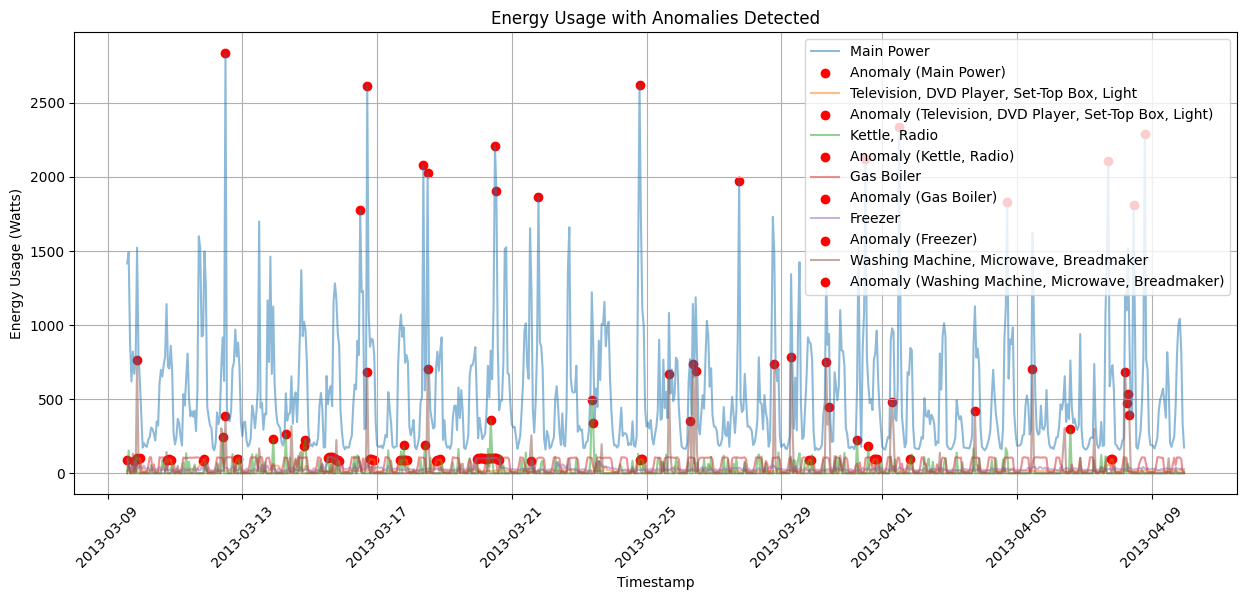


Anomalies in Main Power:
timestamp
2013-03-12 12:00:00    2833.658579
2013-03-16 12:00:00    1774.284992
2013-03-16 17:00:00    2615.949731
2013-03-18 09:00:00    2079.245819
2013-03-18 12:00:00    2024.801358
2013-03-20 12:00:00    2208.043551
2013-03-20 13:00:00    1906.406518
2013-03-21 19:00:00    1861.798246
2013-03-24 19:00:00    2619.822335
2013-03-27 18:00:00    1972.530329
2013-03-31 12:00:00    2122.789916
2013-04-01 12:00:00    2333.734558
2013-04-04 17:00:00    1831.783051
2013-04-07 17:00:00    2107.514334
2013-04-08 11:00:00    1813.178808
2013-04-08 19:00:00    2288.658249
Name: Main Power, dtype: float64

Anomalies in Television, DVD Player, Set-Top Box, Light:
timestamp
2013-03-09 21:00:00    100.043771
2013-03-09 22:00:00     99.345763
2013-03-09 23:00:00    100.897785
2013-03-10 18:00:00     91.983165
2013-03-10 20:00:00     96.034188
2013-03-10 21:00:00     91.836457
2013-03-11 20:00:00     80.011945
2013-03-11 21:00:00     94.722034
2013-03-12 20:00:00     95.2337

In [3]:
import pandas as pd
import numpy as np
import hdf5plugin
import h5py
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/users/kjain/Project/house4_january2013_some_appliances.csv'
df = pd.read_csv(file_path, parse_dates=['timestamp'], index_col='timestamp')

# Resample data to hourly mean to reduce noise
df_resampled = df.resample('1H').mean()

# Plot Time Series Data
plt.figure(figsize=(15, 6))
for column in df_resampled.columns:
    plt.plot(df_resampled.index, df_resampled[column], label=column)

plt.xlabel('Timestamp')
plt.ylabel('Energy Usage (Watts)')
plt.title('Energy Usage Patterns - House4')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# --- Anomaly Detection ---
# Define threshold using standard deviation
threshold = 3 # Adjust this if needed
mean_usage = df_resampled.mean()
std_dev = df_resampled.std()

# Identify anomalies (values beyond mean ± threshold * std deviation)
anomalies = ((df_resampled - mean_usage).abs() > (threshold * std_dev))

# Plot Anomalies
plt.figure(figsize=(15, 6))
for column in df_resampled.columns:
    plt.plot(df_resampled.index, df_resampled[column], label=column, alpha=0.5)
    anomaly_points = df_resampled[column][anomalies[column]]
    plt.scatter(anomaly_points.index, anomaly_points, color='red', label=f'Anomaly ({column})')

plt.xlabel('Timestamp')
plt.ylabel('Energy Usage (Watts)')
plt.title('Energy Usage with Anomalies Detected')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Print anomaly timestamps
for column in df_resampled.columns:
    print(f"\nAnomalies in {column}:")
    print(df_resampled[column][anomalies[column]].dropna())